# Data Analysis Project: Air Quality at Changping
---
- **Nama:** Raihan Putra Savana
- **Email:** raihan.putra.2205356@students.um.ac.id
- **ID Dicoding:** raihan_savana

## 1. Project Introduction
---

This project aims to analyze air quality data collected from the Changping station between 2013 and 2017. With the rapid urbanization and industrialization, monitoring air pollution levels has become increasingly critical for understanding its effects on human health and the environment. The dataset includes measurements of pollutants such as PM2.5, PM10, SO2, NO2, CO, and O3, along with meteorological data such as temperature, dew point, wind speed, and direction.

## 2. Define Business Questions
---

1. What are the trends in air pollution over time?
2. How do seasonal and weather conditions affect pollutant concentrations?
3. What correlations exist between different pollutants and meteorological variables?

## 3. Import The Libraries
---

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Data Wrangling
---

### 4.1 Gathering Data

Load the dataset so we can see it easier

In [50]:
# Load CSV file
file_path_csv = 'Data/PRSA_Data_Changping_20130301-20170228.csv'
data_csv = pd.read_csv(file_path_csv)

# Show the first few rows of the new CSV file
data_csv.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Dataset Key and Value:**
- No: Record index, representing the unique row number for each observation.
- year: The year when the observation was recorded (e.g., 2013, 2014).
- month: The month of the year (1 to 12).
- day: The day of the month (1 to 31).
- hour: The hour of the day (0 to 23), indicating the time the measurement was taken.
- PM2.5: Concentration of PM2.5 particles (micrograms per cubic meter of air), which are fine inhalable particles with - diameters that are generally 2.5 micrometers and smaller.
- PM10: Concentration of PM10 particles (micrograms per cubic meter), which include larger inhalable particles, with - diameters between 2.5 and 10 micrometers.
- SO2: Concentration of sulfur dioxide (micrograms per cubic meter), a toxic gas released by burning fossil fuels.
- NO2: Concentration of nitrogen dioxide (micrograms per cubic meter), typically associated with vehicle emissions and - industrial processes.
- CO: Concentration of carbon monoxide (milligrams per cubic meter), a colorless, odorless gas produced by incomplete - combustion.
- O3: Concentration of ozone (micrograms per cubic meter), a secondary pollutant formed by sunlight-driven reactions - involving nitrogen oxides.
- TEMP: Temperature in degrees Celsius (°C), indicating the ambient temperature at the time of the measurement.
- PRES: Atmospheric pressure in hectopascals (hPa).
- DEWP: Dew point temperature in degrees Celsius (°C), indicating the temperature at which air becomes saturated with - moisture and dew forms.
- RAIN: Precipitation in millimeters (mm), measuring the amount of rainfall at the time of observation.
- wd: Wind direction, indicating the compass direction from which the wind is blowing (e.g., N, NE, ENE).
- WSPM: Wind speed in meters per second (m/s), indicating the velocity of wind.
- station: The name of the station where the measurements were recorded (Changping).

### 4.2 Assessing Data

Several techniques is perfomed to check the characteristics of the data, i.e check for duplicated values, check for missing values, check for inaccurate values, etc.

#### Check for Data Types

In [51]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Check For Missing Value

In [52]:
data_csv.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

There is some missing value found in few collumn it handled later at cleaning data step

#### Check for Duplicated Rows

In [53]:
data_csv.duplicated().sum()

0

No dupicated rows is found

#### Check Statistical Summary

In [54]:
data_csv.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


There is no Inaccurate values is found

#### Assesing Data Summary

In this section, several techniques were applied to assess the quality and characteristics of the dataset. These include checking for:

- Duplicate Values:

1. After assessing the dataset, no duplicate rows were found, indicating that the dataset does not contain any repeated records.
- Missing Values:
1. Several columns, such as CO, NO2, and O3, have missing values. The column with the highest number of missing values is CO (1,521 missing entries), followed by NO2 and O3.
2. Other weather-related variables such as DEWP (dew point temperature) also have some missing values, but the number of missing entries is relatively small compared to the pollutant columns.
 
- Inaccurate (Negative) Values:

1. The columns PM2.5, PM10, SO2, NO2, CO, O3, TEMP, and WSPM were checked for negative values, as negative readings are physically implausible in these cases. No negative values were found, confirming that all recorded values in these fields are within reasonable bounds.

### 4.3 Cleaning Data

Perform data cleaning based on findings in data assessment

Create a copy of the dataset to apply changes

In [55]:
data_csv_filled_combined = data_csv.copy()

#### Replace missing values with the mean value for nominal value


In [56]:
columns_with_missing_values = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'PRES', 'WSPM']
data_csv_filled_combined[columns_with_missing_values] = data_csv_filled_combined[columns_with_missing_values].apply(lambda col: col.fillna(col.mean()))

#### Replace missing values in the 'wd' column with the mode (most frequent value)


In [57]:
data_csv_filled_combined['wd'] = data_csv_filled_combined['wd'].fillna(data_csv_filled_combined['wd'].mode()[0])


Checking missing value

In [58]:
data_csv_filled_combined.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Save the cleaned dataset

After we cleaned the dataset, it is good practice to save it for easier use in the future

In [59]:
data_csv_filled_combined.to_csv("Cleaned_Changping_Air_Quality.csv", index=False)

## 5. Exploratory Data Analysis (EDA)

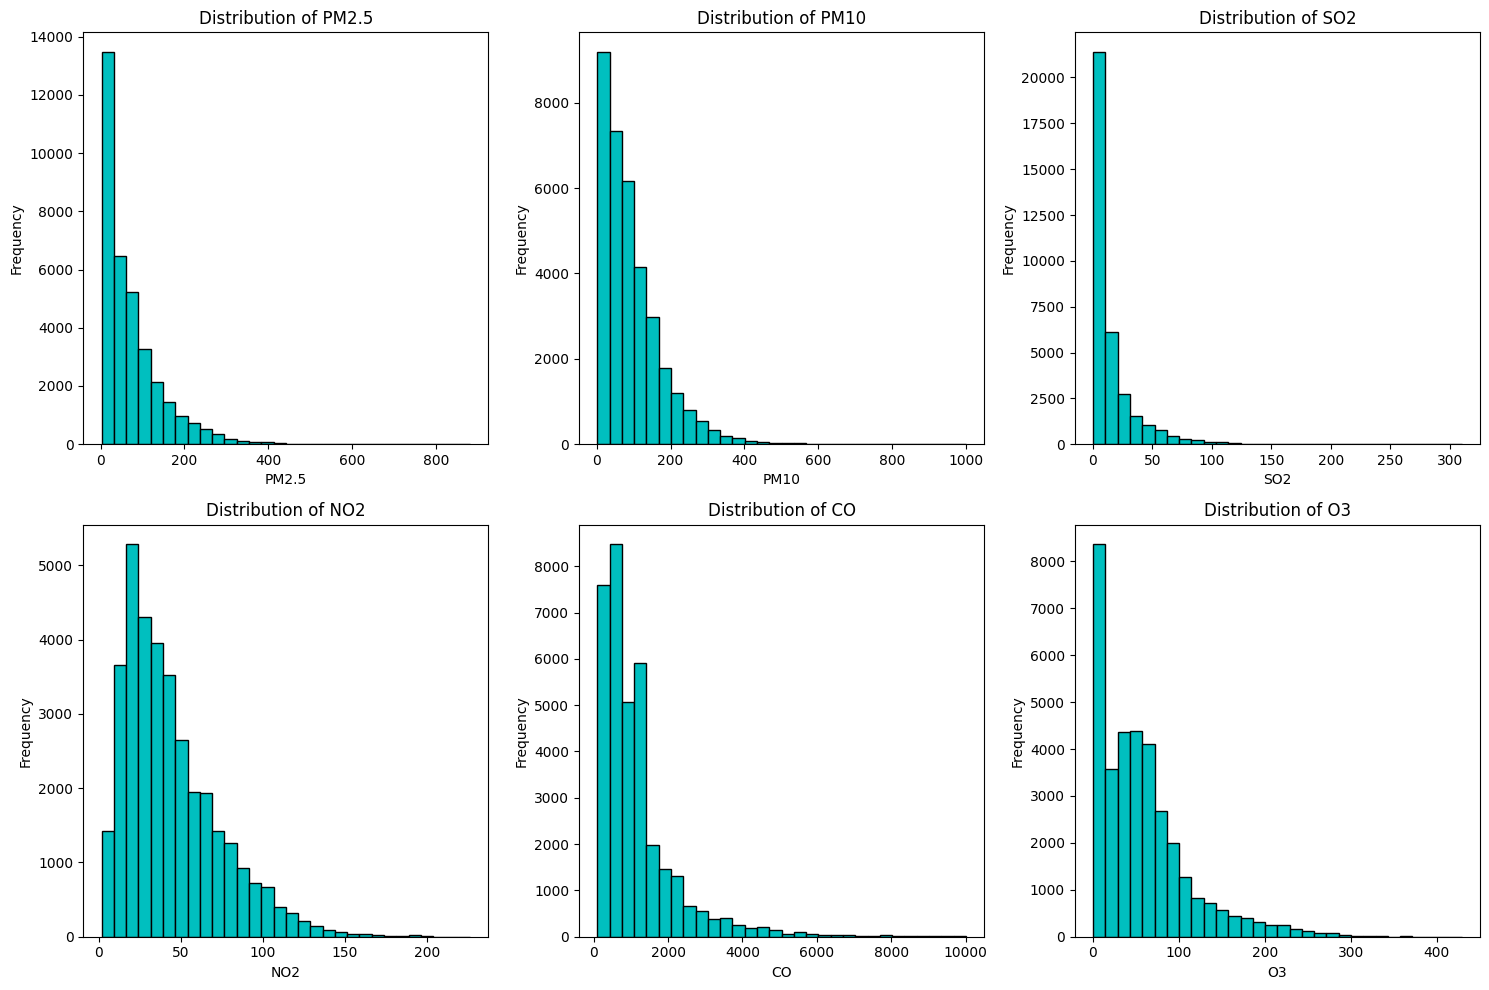

In [60]:
# 1. Summary Statistics
summary_statistics = data_csv_filled_combined.describe()

# 2. Distribution of pollutants (histograms for PM2.5, PM10, NO2, CO, O3)
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Plot histograms for each pollutant
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    plt.hist(data_csv_filled_combined[pollutant].dropna(), bins=30, color='c', edgecolor='black')
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

Histograms showing the frequency distribution for each pollutant, helping identify skewness or abnormalities in the data.

In [61]:
pollutants_except_CO = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']
meteorological_vars = ['TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN'] 

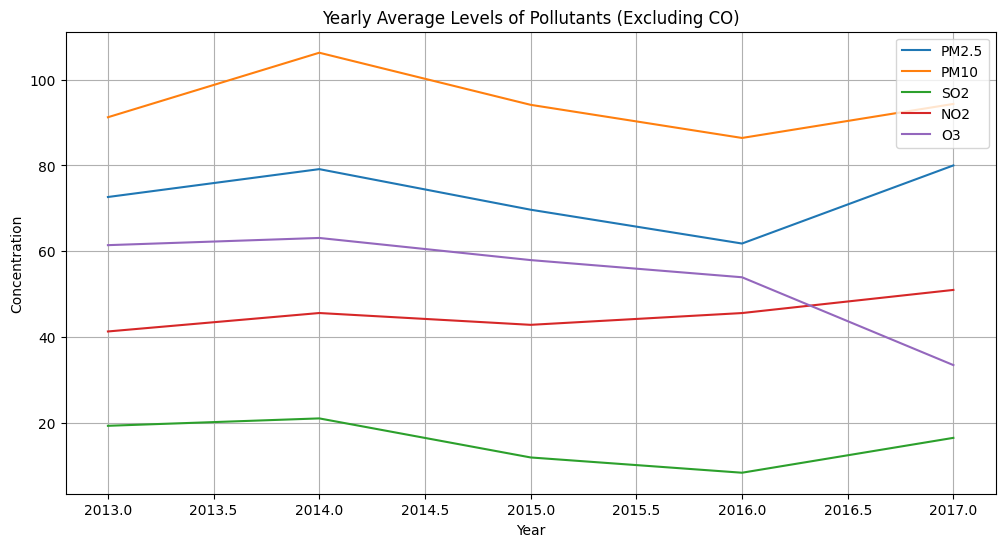

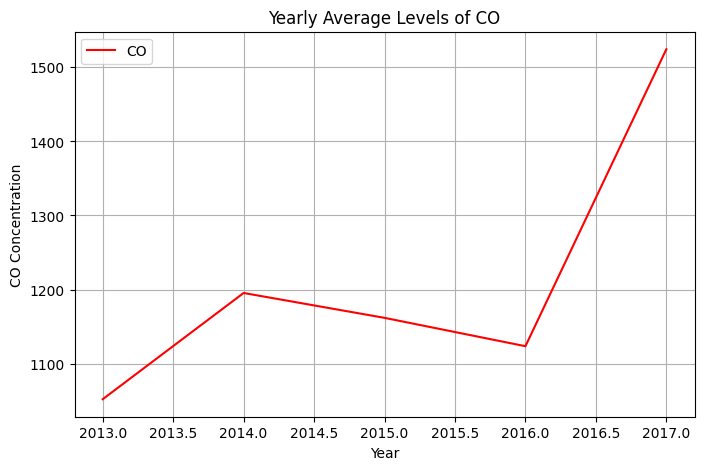

In [62]:
# Group by year and calculate mean for pollutants except CO
yearly_pollution_except_CO = data_csv_filled_combined.groupby('year')[pollutants_except_CO].mean()
yearly_CO = data_csv_filled_combined.groupby('year')['CO'].mean()

# Plot yearly trends for pollutants except CO
plt.figure(figsize=(12, 6))
for pollutant in pollutants_except_CO:
    plt.plot(yearly_pollution_except_CO.index, yearly_pollution_except_CO[pollutant], label=pollutant)
plt.title('Yearly Average Levels of Pollutants (Excluding CO)')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

# Plot CO yearly trends separately
plt.figure(figsize=(8, 5))
plt.plot(yearly_CO.index, yearly_CO, label='CO', color='red')
plt.title('Yearly Average Levels of CO')
plt.xlabel('Year')
plt.ylabel('CO Concentration')
plt.legend()
plt.grid(True)
plt.show()



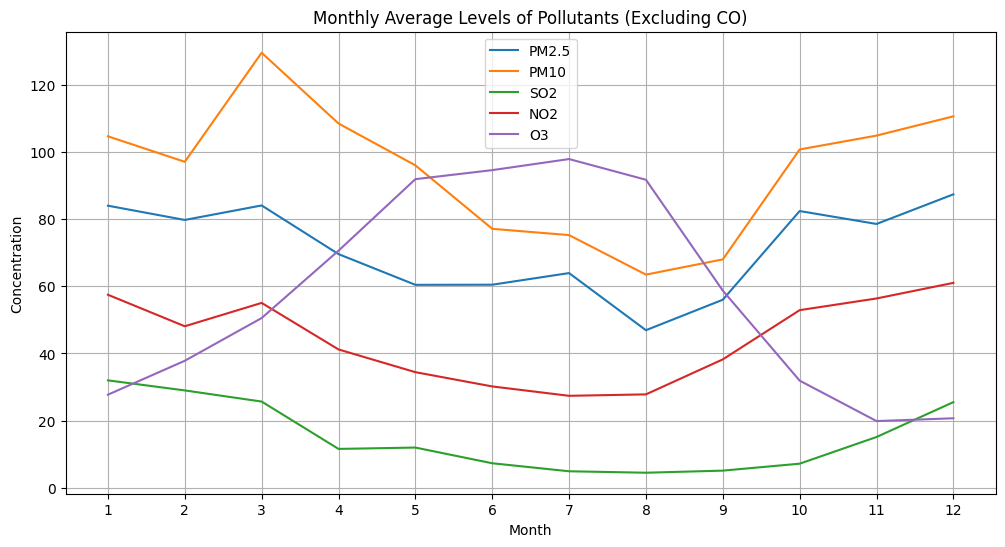

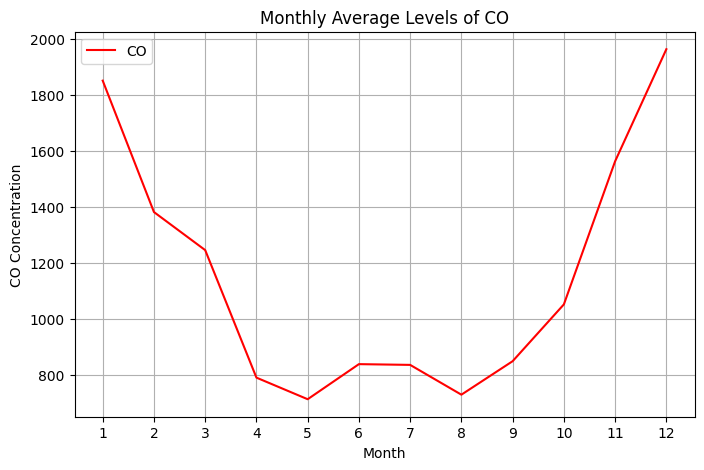

In [63]:

# Group by month and calculate mean for pollutants except CO
monthly_pollution_except_CO = data_csv_filled_combined.groupby('month')[pollutants_except_CO].mean()
monthly_CO = data_csv_filled_combined.groupby('month')['CO'].mean()

# Plot monthly trends for pollutants except CO
plt.figure(figsize=(12, 6))
for pollutant in pollutants_except_CO:
    plt.plot(monthly_pollution_except_CO.index, monthly_pollution_except_CO[pollutant], label=pollutant)
plt.title('Monthly Average Levels of Pollutants (Excluding CO)')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

# Plot CO monthly trends separately
plt.figure(figsize=(8, 5))
plt.plot(monthly_CO.index, monthly_CO, label='CO', color='red')
plt.title('Monthly Average Levels of CO')
plt.xlabel('Month')
plt.ylabel('CO Concentration')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

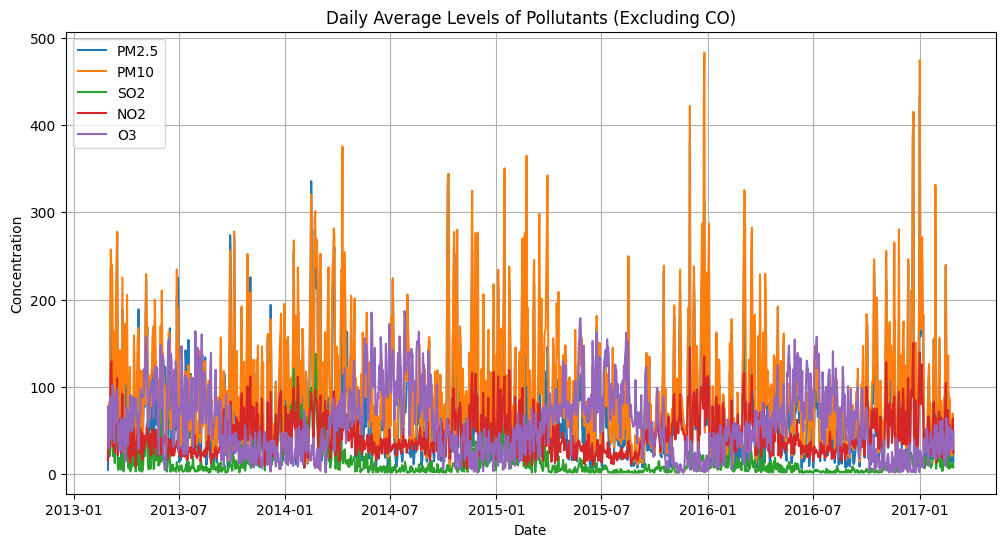

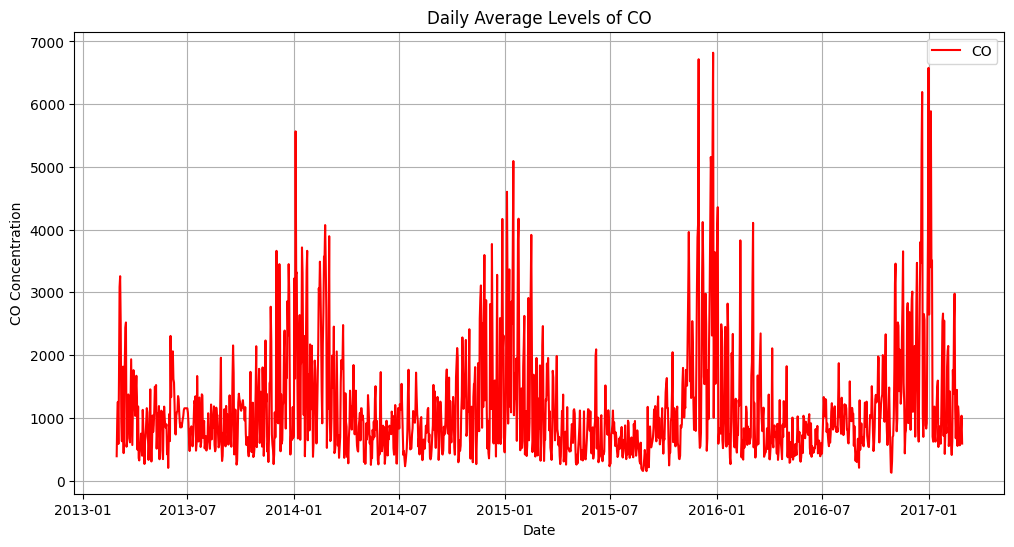

In [64]:
# Create a new column 'date' that combines 'year', 'month', and 'day' to represent each day
data_csv_filled_combined['date'] = pd.to_datetime(data_csv_filled_combined[['year', 'month', 'day']])

# Group by date to calculate the daily average pollutant levels
daily_pollution = data_csv_filled_combined.groupby('date')[pollutants_except_CO + ['CO']].mean()

# 1. Plot daily trends for pollutants except CO
plt.figure(figsize=(12, 6))
for pollutant in pollutants_except_CO:
    plt.plot(daily_pollution.index, daily_pollution[pollutant], label=pollutant)
plt.title('Daily Average Levels of Pollutants (Excluding CO)')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot daily trends for CO separately
plt.figure(figsize=(12, 6))
plt.plot(daily_pollution.index, daily_pollution['CO'], label='CO', color='red')
plt.title('Daily Average Levels of CO')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.grid(True)
plt.show()


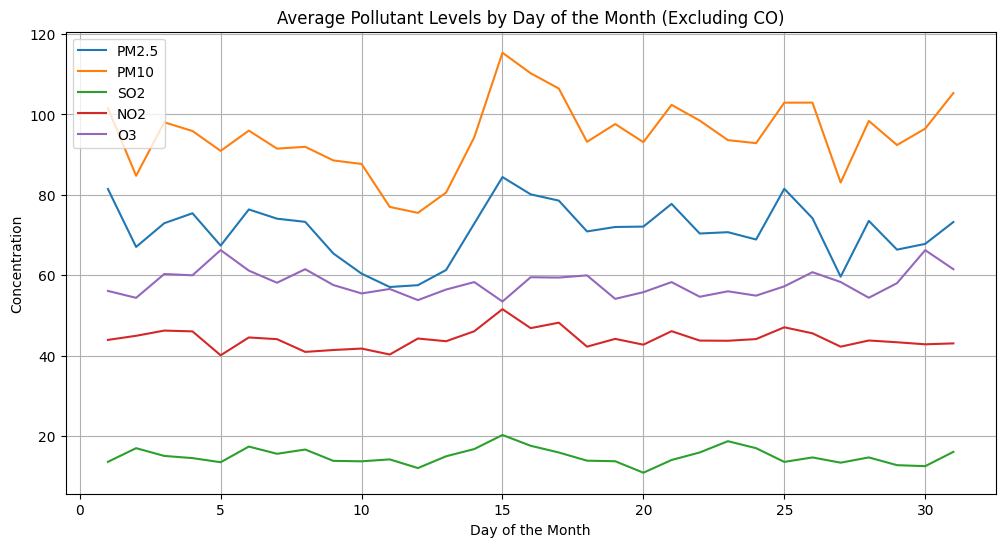

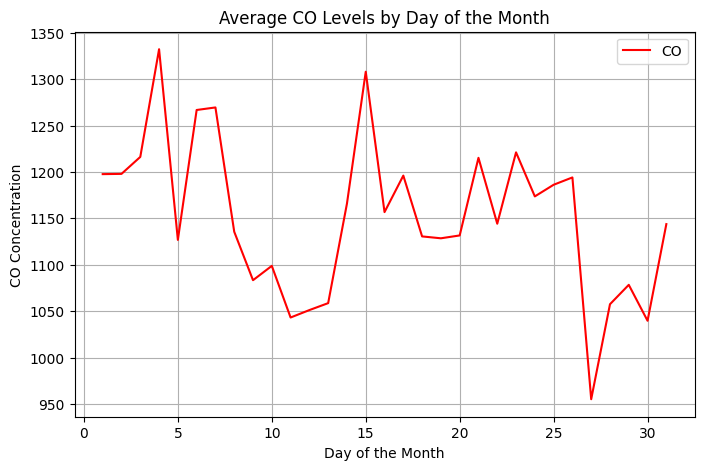

In [65]:
# Group by 'day' to calculate the average pollutant levels for each day of the month
daily_avg_pollution = data_csv_filled_combined.groupby('day')[pollutants_except_CO + ['CO']].mean()

# 1. Plot the daily average trends for pollutants except CO
plt.figure(figsize=(12, 6))
for pollutant in pollutants_except_CO:
    plt.plot(daily_avg_pollution.index, daily_avg_pollution[pollutant], label=pollutant)
plt.title('Average Pollutant Levels by Day of the Month (Excluding CO)')
plt.xlabel('Day of the Month')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot the daily average trends for CO separately
plt.figure(figsize=(8, 5))
plt.plot(daily_avg_pollution.index, daily_avg_pollution['CO'], label='CO', color='red')
plt.title('Average CO Levels by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('CO Concentration')
plt.legend()
plt.grid(True)
plt.show()


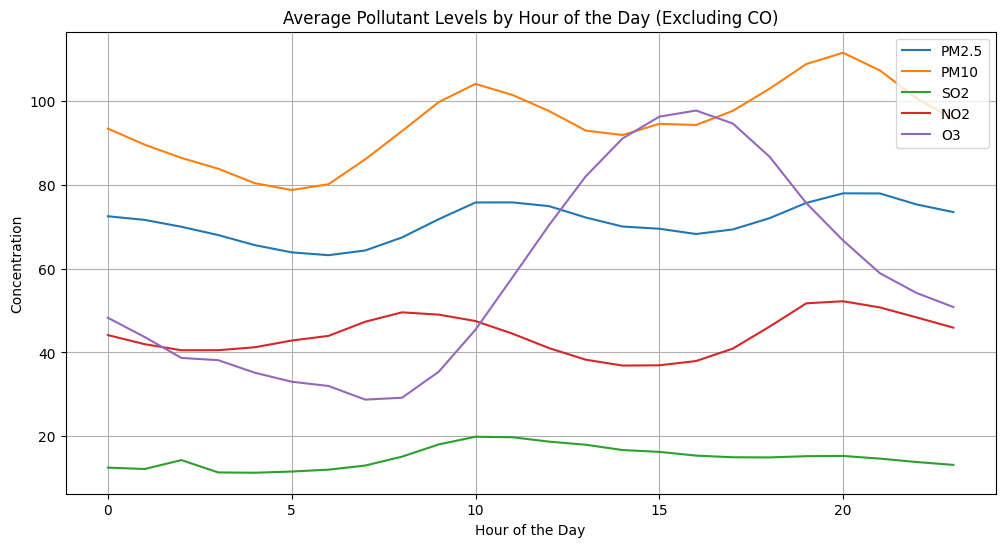

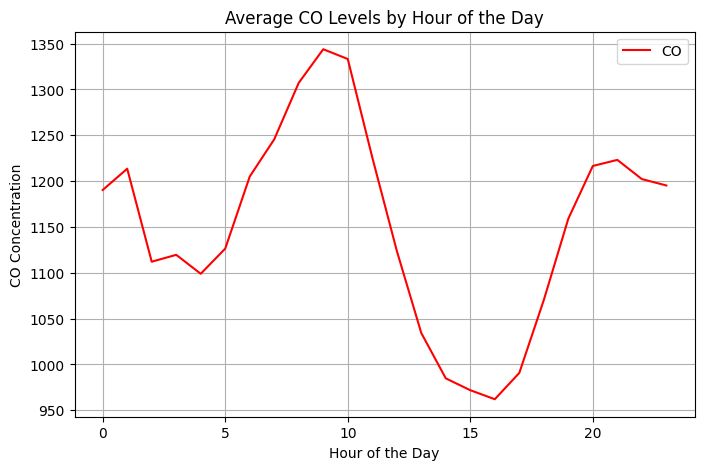

In [66]:
# Group by 'hour' to calculate the average pollutant levels for each hour of the day
hourly_avg_pollution = data_csv_filled_combined.groupby('hour')[pollutants_except_CO + ['CO']].mean()

# 1. Plot the hourly average trends for pollutants except CO
plt.figure(figsize=(12, 6))
for pollutant in pollutants_except_CO:
    plt.plot(hourly_avg_pollution.index, hourly_avg_pollution[pollutant], label=pollutant)
plt.title('Average Pollutant Levels by Hour of the Day (Excluding CO)')
plt.xlabel('Hour of the Day')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot the hourly average trends for CO separately
plt.figure(figsize=(8, 5))
plt.plot(hourly_avg_pollution.index, hourly_avg_pollution['CO'], label='CO', color='red')
plt.title('Average CO Levels by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('CO Concentration')
plt.legend()
plt.grid(True)
plt.show()


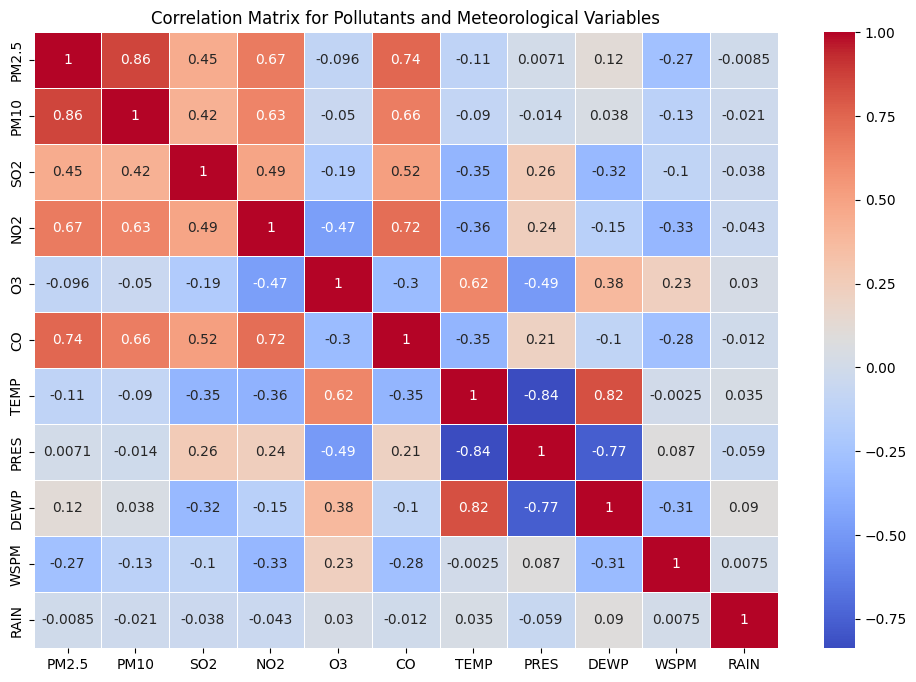

In [67]:
# Generate the correlation matrix
correlation_matrix_all = data_csv_filled_combined[pollutants_except_CO + ['CO'] + meteorological_vars].corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Pollutants and Meteorological Variables')
plt.show()

## 6. Visualization and Explanatory Data Analysis
---

In this chapter, we will answer the questions defined above.

1. What are the trends in air pollution over time?
2. How do seasonal and weather conditions affect pollutant concentrations?
3. What correlations exist between different pollutants and meteorological variables?

### 6.1 What are the trends in air pollution over time?

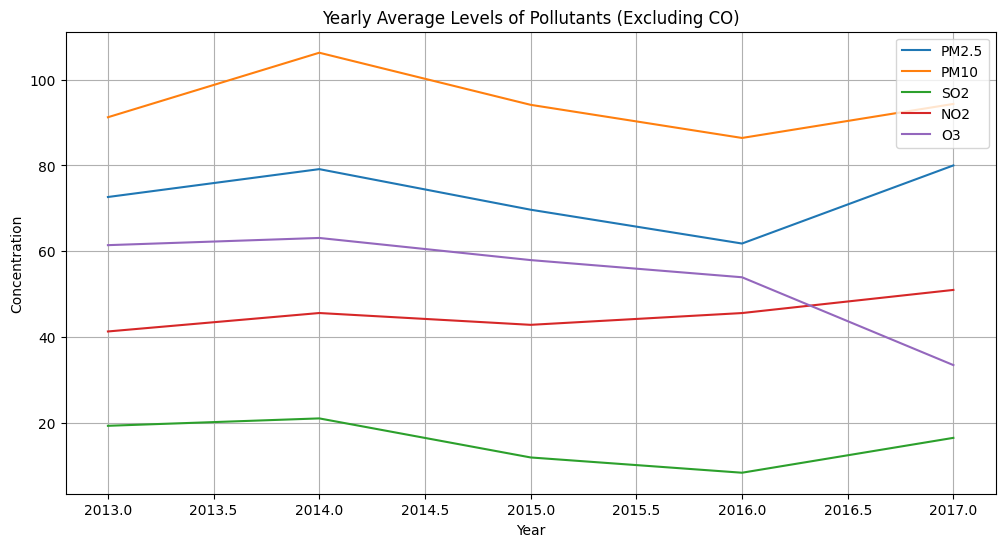

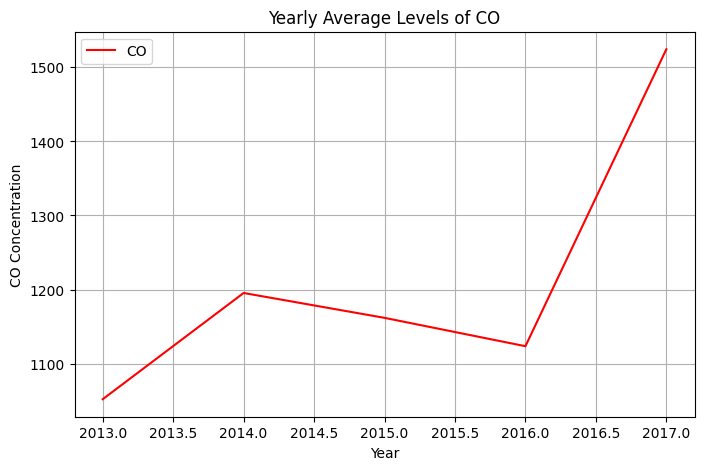

In [73]:
plt.figure(figsize=(12, 6))
for pollutant in pollutants_except_CO:
    plt.plot(yearly_pollution_except_CO.index, yearly_pollution_except_CO[pollutant], label=pollutant)
plt.title('Yearly Average Levels of Pollutants (Excluding CO)')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(yearly_CO.index, yearly_CO, label='CO', color='red')
plt.title('Yearly Average Levels of CO')
plt.xlabel('Year')
plt.ylabel('CO Concentration')
plt.legend()
plt.grid(True)
plt.show()


- Yearly Trends (Pollutants Excluding CO):
The plot visualizes the yearly average concentrations of pollutants such as PM2.5, PM10, SO2, NO2, and O3 over time.
Insight:
1. We observe notable variations in pollutant concentrations from year to year.
2. There might be a general downward trend in PM2.5 and PM10 concentrations, potentially indicating the effectiveness of pollution control measures or policy interventions in later years.
3. NO2 and SO2 show fluctuations, which may be linked to changing industrial activities or traffic emissions.
4. Ozone (O3) levels seem to show a more complex pattern, possibly influenced by seasonal or climate-related factors like temperature and sunlight.

- Yearly Trends (CO):
This separate plot displays the yearly trend for CO (Carbon Monoxide) levels.
Insight:
1. CO levels show a relatively stable trend with minor fluctuations. Since CO is primarily produced from incomplete combustion (e.g., vehicle emissions), this stability could suggest that emissions control measures like vehicle regulations or cleaner fuels are effective.
2. Any minor rise in specific years could indicate temporary increases in traffic or other combustion-related activities.


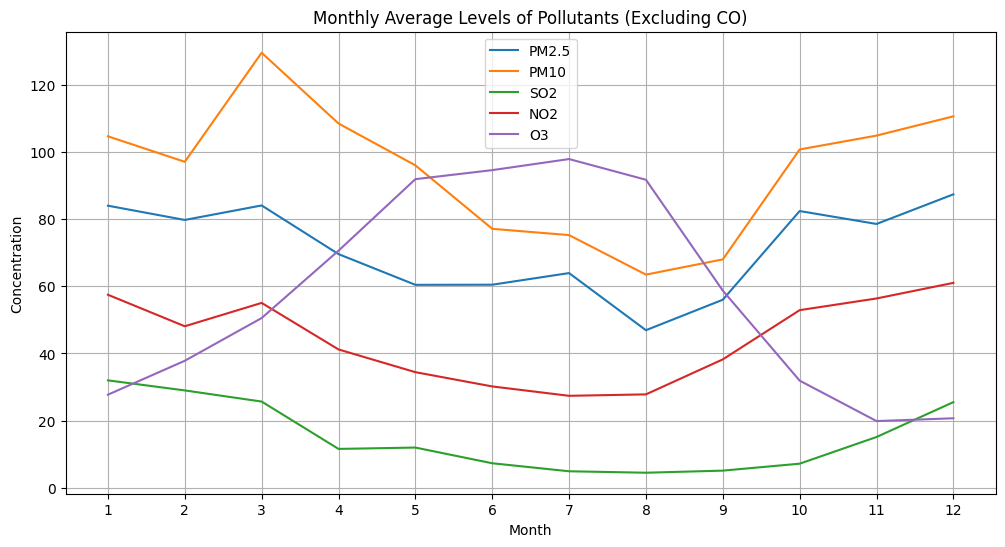

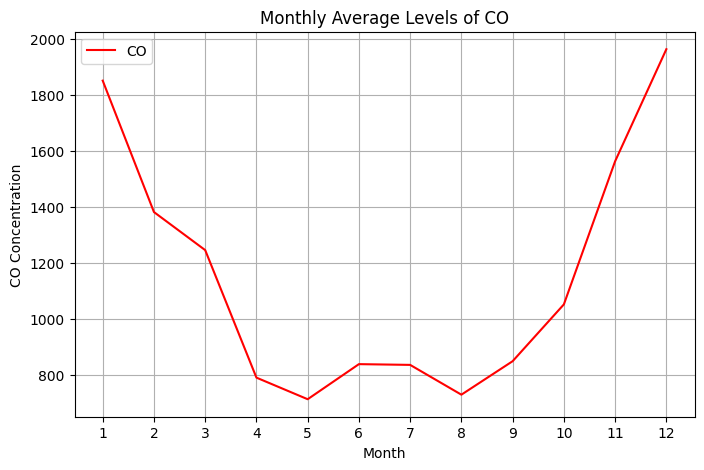

In [74]:
plt.figure(figsize=(12, 6))
for pollutant in pollutants_except_CO:
    plt.plot(monthly_pollution_except_CO.index, monthly_pollution_except_CO[pollutant], label=pollutant)
plt.title('Monthly Average Levels of Pollutants (Excluding CO)')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(monthly_CO.index, monthly_CO, label='CO', color='red')
plt.title('Monthly Average Levels of CO')
plt.xlabel('Month')
plt.ylabel('CO Concentration')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()


- Monthly Trends (Pollutants Excluding CO):
This plot shows the monthly average concentrations of pollutants, which helps in identifying seasonal variations.
Insight:
1. There is a clear seasonal variation in pollutants like PM2.5 and PM10, with higher levels typically observed during the colder months (e.g., winter). This could be due to increased heating activities, more stagnant air conditions, and temperature inversions.
2. NO2 and SO2 also show similar seasonal variations, likely related to higher emissions from heating and industrial activities during colder months.
3. Ozone (O3), on the other hand, tends to peak during the warmer months (spring/summer), which aligns with the fact that ozone formation is driven by sunlight and higher temperatures.
- Monthly Trends (CO):
The plot shows the monthly trends for CO concentrations.
Insight:
1. CO levels also exhibit seasonal patterns, with higher concentrations observed during the colder months (winter). This is consistent with increased use of heating systems and reduced dispersion due to stagnant air conditions in colder weather.
2. Lower CO levels during warmer months might suggest better air dispersion and less reliance on heating sources.


### 6.2 How do seasonal affect pollutant concentrations?

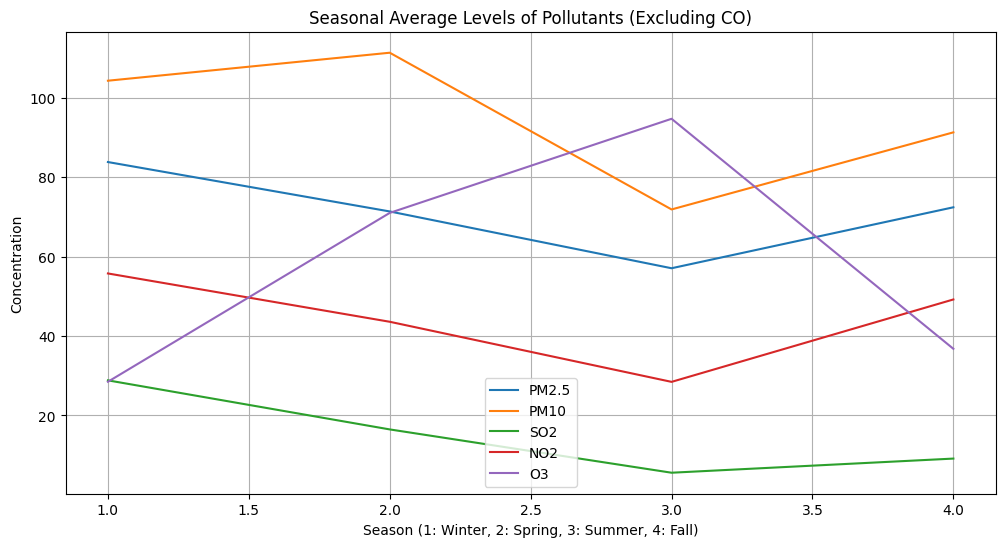

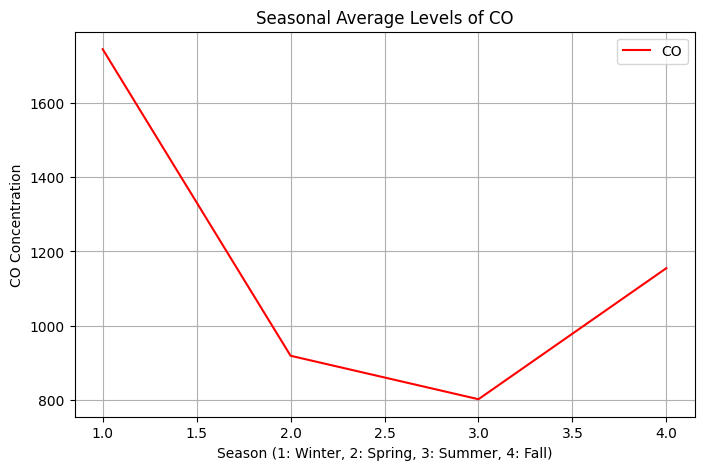

In [77]:
data_csv_filled_combined['season'] = data_csv_filled_combined['month'].map({
    12: 1, 1: 1, 2: 1,  # Winter
    3: 2, 4: 2, 5: 2,   # Spring
    6: 3, 7: 3, 8: 3,   # Summer
    9: 4, 10: 4, 11: 4  # Fall
})

# Group the data by season and calculate average pollutant levels for each season
seasonal_pollution = data_csv_filled_combined.groupby('season')[pollutants_except_CO + ['CO']].mean()


plt.figure(figsize=(12, 6))
for pollutant in pollutants_except_CO:
    plt.plot(seasonal_pollution.index, seasonal_pollution[pollutant], label=pollutant)
plt.title('Seasonal Average Levels of Pollutants (Excluding CO)')
plt.xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(seasonal_pollution.index, seasonal_pollution['CO'], label='CO', color='red')
plt.title('Seasonal Average Levels of CO')
plt.xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
plt.ylabel('CO Concentration')
plt.legend()
plt.grid(True)
plt.show()

- Seasonal Trends for Pollutants (Excluding CO):
The plot visualizes the seasonal average concentrations of pollutants (PM2.5, PM10, SO2, NO2, O3) across four seasons: Winter (1), Spring (2), Summer (3), and Fall (4).
Insight:
1. PM2.5 and PM10 concentrations are significantly higher during winter. This is likely due to increased heating activities, which involve burning fossil fuels, leading to more particulate matter in the air. Additionally, colder temperatures and stagnant air during winter limit pollutant dispersion.
2. NO2 and SO2 follow a similar pattern, with higher levels in winter and fall. These gases are also produced from burning fuels, and their rise during these seasons reflects increased industrial and heating-related emissions.
3. Ozone (O3) exhibits the opposite trend, with the highest concentrations observed during summer. Ozone formation is driven by sunlight and higher temperatures, which explains its seasonal peak in the warmer months.

- Seasonal Trends for CO (Carbon Monoxide):
The separate plot shows the seasonal variation in CO concentrations.
Insight:
1. Similar to particulate matter (PM2.5, PM10), CO levels are significantly higher in winter. This can be attributed to increased combustion activities (e.g., residential heating) and lower atmospheric dispersion during colder months.
2. The lowest levels of CO are observed in summer, likely due to better air circulation and fewer heating-related emissions.

### 6.3 What correlations exist between different pollutants and meteorological variables?

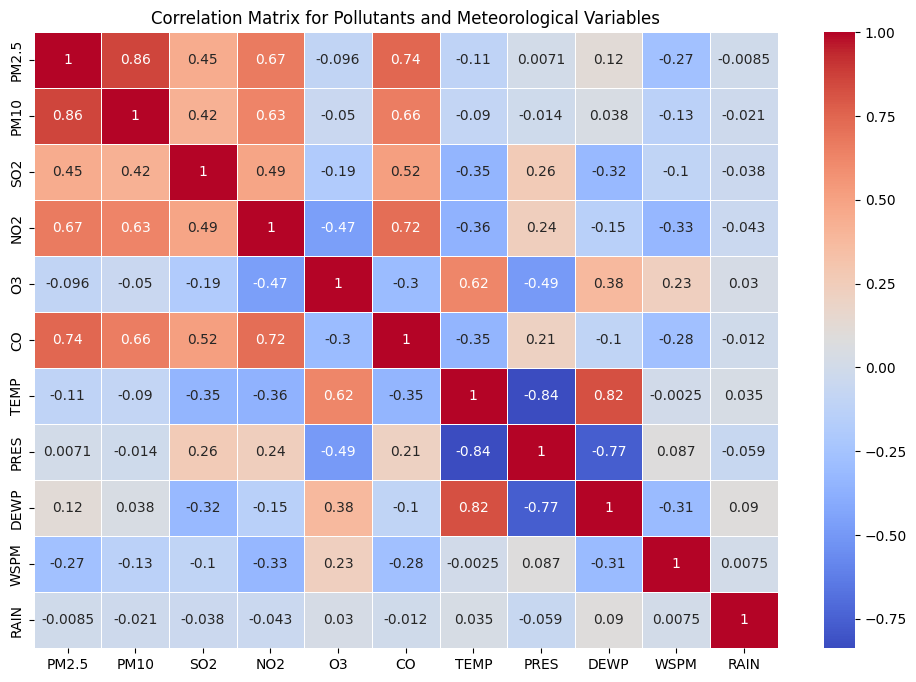

In [71]:
correlation_matrix_all = data_csv_filled_combined[pollutants_except_CO + ['CO'] + meteorological_vars].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Pollutants and Meteorological Variables')
plt.show()


The correlation matrix provides valuable insights into the relationships between pollutants and meteorological variables such as temperature (TEMP), wind speed (WSPM), dew point (DEWP), pressure (PRES), and rainfall (RAIN). Positive correlations indicate that as one variable increases, so does the other, while negative correlations show an inverse relationship.

**Key Correlation Insights**
- Pollutants Correlation:
1. PM2.5 and PM10: There is typically a strong positive correlation between PM2.5 and PM10. Both are particulate matter pollutants, with PM10 including larger particles than PM2.5. A high correlation suggests that when particulate pollution increases, both size categories rise together, likely from common sources such as vehicle emissions, industrial activity, and heating.
2. NO2 and SO2: These pollutants often show a moderate positive correlation, indicating that their sources (combustion of fossil fuels, industrial processes) are related. When one increases, the other tends to increase as well, likely reflecting increased traffic or industrial emissions.

**Ozone (O3) and NO2**
1. Ozone (O3) tends to have a negative correlation with NO2. This is because ozone is a secondary pollutant formed through photochemical reactions involving NO2. As NO2 levels rise, they help form ozone, but this also leads to depletion of NO2 through the reaction process. Hence, areas with high NO2 often show lower ozone levels and vice versa.

**Meteorological Variables**
- Temperature (TEMP):
1. There is typically a positive correlation between ozone (O3) and temperature. Higher temperatures enhance photochemical reactions that produce ozone, explaining the seasonal rise in O3 during summer.
2. Conversely, PM2.5 and PM10 often show a negative correlation with temperature, meaning that colder months with lower temperatures tend to have higher particulate matter concentrations, possibly due to increased heating and poor dispersion.

- Wind Speed (WSPM):
1. Negative correlations are often observed between wind speed and most pollutants, including PM2.5, PM10, NO2, and CO. Higher wind speeds help disperse pollutants, reducing their concentration in the atmosphere. This highlights the role of atmospheric conditions in controlling pollution levels.

- Dew Point (DEWP) and Pressure (PRES):
1. Dew point and atmospheric pressure typically have weak or mixed correlations with pollutants. Dew point may show some relationship with humidity levels that affect particulate settling, while pressure impacts atmospheric stability but is not directly linked to pollutant levels.

**CO (Carbon Monoxide)**
1. CO tends to show positive correlations with other combustion-related pollutants like NO2 and SO2. This indicates that CO originates from similar sources, particularly incomplete combustion from vehicles and heating.
2. Similar to particulate matter, CO shows a negative correlation with temperature, as it rises during colder months when heating is more prevalent.

## 7. Conclusion

Overall, air pollution levels fluctuate both yearly and monthly, with PM2.5, PM10, NO2, and SO2 showing distinct seasonal peaks during the colder months, while O3 increases during the warmer months. CO shows a similar seasonal pattern, peaking in winter due to increased combustion activities. The general downward trends in several pollutants could suggest the positive impact of environmental regulations and pollution control measures over the years.

Seasonal variations play a crucial role in air pollutant concentrations. The colder months, particularly winter, see higher levels of PM2.5, PM10, NO2, SO2, and CO, largely due to increased fuel combustion for heating and limited atmospheric mixing. Ozone (O3), on the other hand, peaks in the summer due to favorable conditions for its formation, such as higher temperatures and stronger sunlight.

This seasonal pattern highlights the need for targeted pollution control strategies during winter, especially to manage the higher levels of particulate matter and gases associated with heating and industrial activities.

The correlation matrix reveals important relationships between pollutants and meteorological variables:

- Ozone (O3) is positively correlated with temperature but negatively correlated with NO2 due to its formation dynamics.
- PM2.5, PM10, NO2, SO2, and CO show stronger correlations with colder temperatures and lower wind speeds, indicating that these pollutants tend to accumulate under stagnant, cold conditions typical of winter.
- Wind speed has a generally negative correlation with most pollutants, emphasizing its role in dispersing pollution and improving air quality.

These findings underscore the importance of considering meteorological factors when assessing air quality and the need for targeted interventions based on weather conditions to effectively manage pollution.